Question 1 and 2 are the same.
I am not sure if i read the question 1 correctly or not, I thought we could use any model in Question 1, the second question specifies to use linear regression but i used linear regression in question 1 as well.
i have used other models at the end of the notebook, please consider them as well

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("clickdata.csv")
data.head()

,User ID,Gender,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,15624510,Female,35,61833.90,256.09,0
1,15810944,Male,31,68441.85,193.77,0
2,15668575,Female,26,59785.94,-999.00,0
3,15603246,Male,29,54806.18,245.89,0
4,15804002,Female,35,NaN,225.58,0


In [2]:
data.dropna(how='any',inplace=True)

In [19]:
data.replace(-99, -9999, inplace=True)

In [20]:
data.head()

,User ID,Gender,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,15624510,0,35,61833.90,256.09,0
1,15810944,1,31,68441.85,193.77,0
2,15668575,0,26,59785.94,-999.00,0
3,15603246,1,29,54806.18,245.89,0
5,15728773,1,23,59761.56,226.74,0


In [21]:
data['Gender'].replace('Female',0,inplace=True)
data['Gender'].replace('Male',1,inplace=True)

In [22]:
x = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values 

In [23]:
x

array([[ 0.000000e+00,  3.500000e+01,  6.183390e+04,  2.560900e+02],
       [ 1.000000e+00,  3.100000e+01,  6.844185e+04,  1.937700e+02],
       [ 0.000000e+00,  2.600000e+01,  5.978594e+04, -9.990000e+02],
       ...,
       [ 0.000000e+00,  2.800000e+01,  6.692903e+04,  2.196900e+02],
       [ 1.000000e+00,  4.000000e+01,  7.552478e+04,  1.983200e+02],
       [ 1.000000e+00,  2.700000e+01,  6.626534e+04,  2.012400e+02]])

In [24]:
normalized_data=(data-data.mean())/data.std()


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x = scaler.fit_transform(x)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.25,random_state=0)

In [28]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression()

In [29]:
predictions = logmodel.predict(x_test)
predictions

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        50
           1       0.84      0.74      0.79        50

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



In [31]:
from sklearn.metrics import confusion_matrix  
y_pred=logmodel.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  
cm

array([[43,  7],
       [13, 37]], dtype=int64)

In [32]:
[[TN,  FP],
[ FN, TP]]=cm

accuracy=(TP+TN)/(TP+TN+FP+FN)
accuracy

0.8

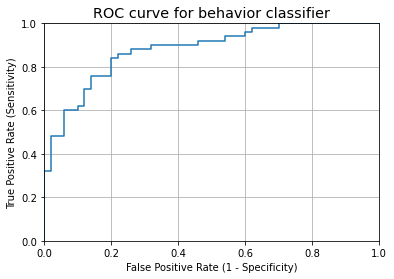

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
import sklearn.metrics as metrics
import seaborn as sns
%matplotlib inline
probs_y=logmodel.predict_proba(x_test) 

fpr, tpr, thresholds = metrics.roc_curve(y_test,probs_y[:,1])

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for behavior classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [34]:
print("Accuracy", logmodel.score(x_test,y_test))

Accuracy 0.8


In [35]:
from sklearn import preprocessing

Question 3

In [38]:

normalized_1 = preprocessing.normalize(data)

In [39]:
normalized_1

array([[ 9.99992169e-01,  0.00000000e+00,  2.24005271e-06,
         3.95746272e-03,  1.63901456e-05,  0.00000000e+00],
       [ 9.99990631e-01,  6.32467379e-08,  1.96064887e-06,
         4.32872375e-03,  1.22553204e-05,  0.00000000e+00],
       [ 9.99992718e-01,  0.00000000e+00,  1.65936026e-06,
         3.81563127e-03, -6.37577269e-05,  0.00000000e+00],
       ...,
       [ 9.99990860e-01,  0.00000000e+00,  1.78863004e-06,
         4.27540263e-03,  1.40337191e-05,  6.38796443e-08],
       [ 9.99988510e-01,  6.34711119e-08,  2.53884448e-06,
         4.79364176e-03,  1.25875909e-05,  0.00000000e+00],
       [ 9.99990971e-01,  6.41264808e-08,  1.73141498e-06,
         4.24936306e-03,  1.29048130e-05,  0.00000000e+00]])

X = data.iloc[:,1:-1].values
Y = data.iloc[:,-1].values 

In [67]:
X = data.iloc[:,1:-1].values
Y = data.iloc[:,-1].values 

In [68]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.25)

In [69]:
import matplotlib.pyplot as plt

In [70]:
from sklearn.neighbors import KNeighborsClassifier
neighbours = np.arange(1,5)
train_accuracy = np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    train_accuracy[i] = knn.score(X_train,Y_train)
    test_accuracy[i] = knn.score(X_test,Y_test)

print(train_accuracy)
print(test_accuracy)

[1.         0.83221477 0.82550336 0.77181208]
[0.67 0.66 0.65 0.69]


Text(0, 0.5, 'Accuracy')

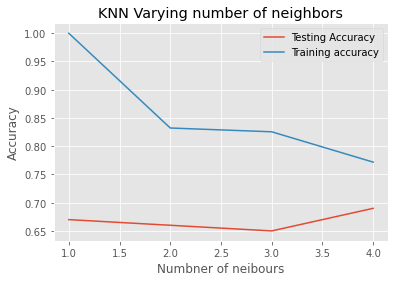

In [71]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.title("KNN Varying number of neighbors")
plt.plot(neighbours,test_accuracy,label="Testing Accuracy")
plt.plot(neighbours,train_accuracy,label="Training accuracy")
plt.legend()
plt.xlabel("Numbner of neibours")
plt.ylabel("Accuracy")

In [72]:
# We can observe above that we get maximum testing accuracy for k=5. 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
print("Accuracy", knn.score(X_test,Y_test))

Accuracy 0.63


In [73]:
knn_y_pred = knn.predict(X_test)
knn_y_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [74]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_y_pred))

              precision    recall  f1-score   support

           0       0.54      0.58      0.56        50
           1       0.54      0.50      0.52        50

    accuracy                           0.54       100
   macro avg       0.54      0.54      0.54       100
weighted avg       0.54      0.54      0.54       100



In [75]:
from sklearn.metrics import confusion_matrix  
knn_y_pred=logmodel.predict(X_test)
cm = confusion_matrix(Y_test, knn_y_pred)  
cm

array([[53,  0],
       [47,  0]], dtype=int64)

In [76]:
[[TN,  FP],
[ FN, TP]]=cm

accuracy=(TP+TN)/(TP+TN+FP+FN)
accuracy

0.53

In [ ]:
Question 1 extended

In [77]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [78]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8


In [79]:
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8571428571428571
Recall: 0.72


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        50
           1       0.86      0.72      0.78        50

    accuracy                           0.80       100
   macro avg       0.81      0.80      0.80       100
weighted avg       0.81      0.80      0.80       100



In [81]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class

n_model = GaussianNB()  # 2. instantiate model
n_model.fit(x_train,y_train)   # 3. fit model to data

GaussianNB()

In [82]:
n_y_pred = n_model.predict(x_test) # 4. predict on new data

In [83]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, n_y_pred)

0.8

In [84]:
print(classification_report(y_test,n_y_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        50
           1       0.88      0.70      0.78        50

    accuracy                           0.80       100
   macro avg       0.81      0.80      0.80       100
weighted avg       0.81      0.80      0.80       100

